<a href="https://colab.research.google.com/github/AdityaKendre02/COVID-19_DS-Project/blob/main/COVID_19_DS_Project_Aditya_Kendre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Basic Libraries needed for EDA**

In [ ]:
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  %matplotlib inline

# Getting the Data

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DAV Selection Assignment/Part 1- EDA/WHO-COVID-19-global-data.csv')

# EDA Starts!

In [ ]:
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
209266,2022-05-30,ZW,Zimbabwe,AFRO,0,251092,0,5500
209267,2022-05-31,ZW,Zimbabwe,AFRO,0,251092,0,5500
209268,2022-06-01,ZW,Zimbabwe,AFRO,0,251092,0,5500
209269,2022-06-02,ZW,Zimbabwe,AFRO,0,251092,0,5500


In [ ]:
df['Date']=pd.to_datetime(df['Date_reported'])

In [ ]:
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Date
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0,2020-01-03
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0,2020-01-04
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0,2020-01-05
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0,2020-01-06
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0,2020-01-07
...,...,...,...,...,...,...,...,...,...
209266,2022-05-30,ZW,Zimbabwe,AFRO,0,251092,0,5500,2022-05-30
209267,2022-05-31,ZW,Zimbabwe,AFRO,0,251092,0,5500,2022-05-31
209268,2022-06-01,ZW,Zimbabwe,AFRO,0,251092,0,5500,2022-06-01
209269,2022-06-02,ZW,Zimbabwe,AFRO,0,251092,0,5500,2022-06-02


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209271 entries, 0 to 209270
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date_reported      209271 non-null  object        
 1   Country_code       208388 non-null  object        
 2   Country            209271 non-null  object        
 3   WHO_region         209271 non-null  object        
 4   New_cases          209271 non-null  int64         
 5   Cumulative_cases   209271 non-null  int64         
 6   New_deaths         209271 non-null  int64         
 7   Cumulative_deaths  209271 non-null  int64         
 8   Date               209271 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 14.4+ MB


**Above table clearly shows us that there is no null value in the datframe, so we don't need to worry about filling missing data**

In [ ]:
df.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,2.092710e+05,2.092710e+05,209271.000000,209271.000000
mean,2.526945e+03,6.843096e+05,30.080465,12332.135102
std,1.648901e+04,3.572577e+06,160.869132,56844.331981
min,-3.295200e+04,0.000000e+00,-2439.000000,0.000000
25%,0.000000e+00,2.570000e+02,0.000000,2.000000
50%,2.400000e+01,1.280800e+04,0.000000,163.000000
75%,4.950000e+02,1.823605e+05,6.000000,2981.000000
max,1.253514e+06,8.355139e+07,11447.000000,998070.000000


**From the above describe method we can clearly see that there are negative values in the New_cases and New_deaths columns as the minimum values are negative!**

In [ ]:
#Number of negative values in 'New_cases'
df[(df[['New_cases']] < 0).all(1)]['New_cases'].count()

73

In [ ]:
#Number of negative values in 'New_deaths'
df[(df[['New_deaths']] < 0).all(1)]['New_deaths'].count()

23

**We will not do anything to these negative values as they are very few datapoints in comparison to the entire dataset and will not affect the EDA very much**

In [ ]:
df['Country_code'].unique()

array(['AF', 'AL', 'DZ', 'AS', 'AD', 'AO', 'AI', 'AG', 'AR', 'AM', 'AW',
       'AU', 'AT', 'AZ', 'BS', 'BH', 'BD', 'BB', 'BY', 'BE', 'BZ', 'BJ',
       'BM', 'BT', 'BO', 'XA', 'BA', 'BW', 'BR', 'VG', 'BN', 'BG', 'BF',
       'BI', 'CV', 'KH', 'CM', 'CA', 'KY', 'CF', 'TD', 'CL', 'CN', 'CO',
       'KM', 'CG', 'CK', 'CR', 'CI', 'HR', 'CU', 'CW', 'CY', 'CZ', 'KP',
       'CD', 'DK', 'DJ', 'DM', 'DO', 'EC', 'EG', 'SV', 'GQ', 'ER', 'EE',
       'SZ', 'ET', 'FK', 'FO', 'FJ', 'FI', 'FR', 'GF', 'PF', 'GA', 'GM',
       'GE', 'DE', 'GH', 'GI', 'GR', 'GL', 'GD', 'GP', 'GU', 'GT', 'GG',
       'GN', 'GW', 'GY', 'HT', 'VA', 'HN', 'HU', 'IS', 'IN', 'ID', 'IR',
       'IQ', 'IE', 'IM', 'IL', 'IT', 'JM', 'JP', 'JE', 'JO', 'KZ', 'KE',
       'KI', 'XK', 'KW', 'KG', 'LA', 'LV', 'LB', 'LS', 'LR', 'LY', 'LI',
       'LT', 'LU', 'MG', 'MW', 'MY', 'MV', 'ML', 'MT', 'MH', 'MQ', 'MR',
       'MU', 'YT', 'MX', 'FM', 'MC', 'MN', 'ME', 'MS', 'MA', 'MZ', 'MM',
       nan, 'NR', 'NP', 'NL', 'NC', 'NZ', 'NI', 'NE

In [ ]:
df['WHO_region'].unique()

array(['EMRO', 'EURO', 'AFRO', 'WPRO', 'AMRO', 'SEARO', 'Other'],
      dtype=object)

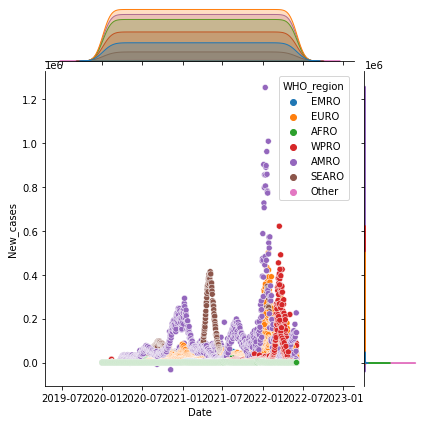

In [ ]:
sns.jointplot(x='Date',y='New_cases',data=df,hue='WHO_region')

**Since we are not getting clear visualisation in this graph so we will separate the graphs as shown below**

***I have added legend in this but since the output is looking messier, so I have avoided legend in the other plots below***

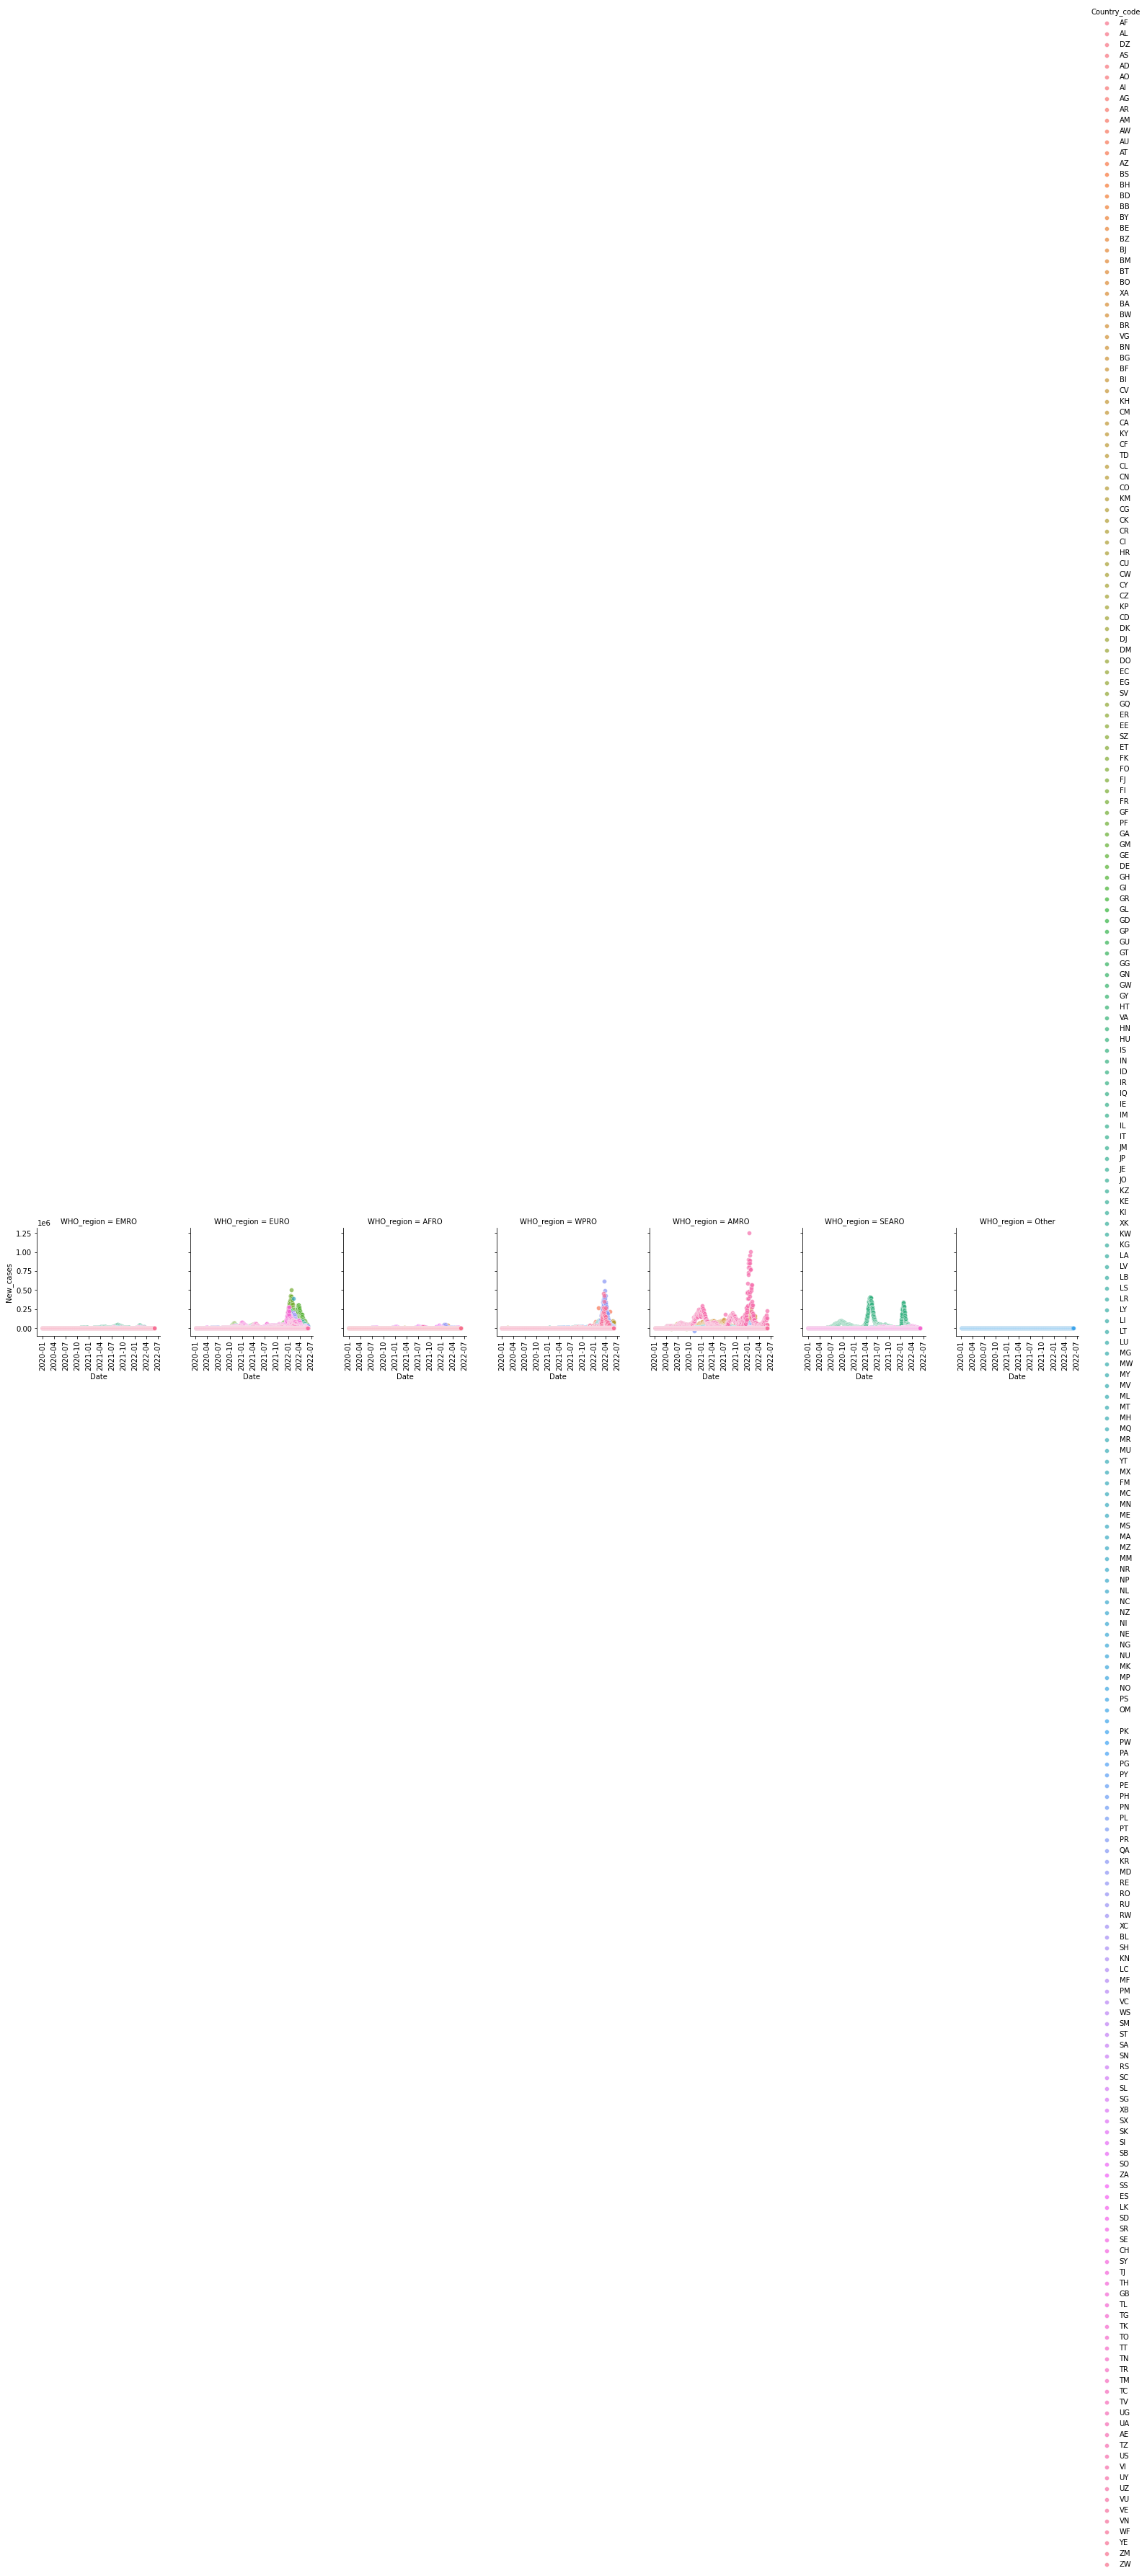

In [ ]:

g=sns.FacetGrid(data=df,col='WHO_region',hue="Country_code")
g.map(sns.scatterplot, "Date", "New_cases", alpha=.7)
g.add_legend()
for ax in g.axes.flat:
  for label in ax.get_xticklabels():
    label.set_rotation(90)

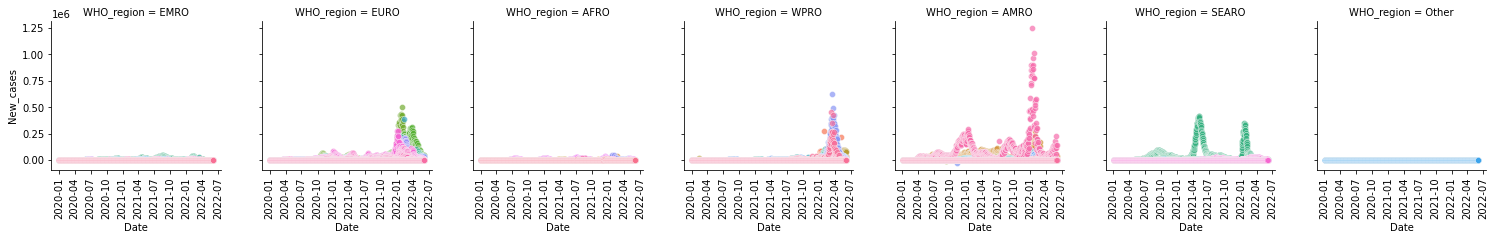

In [ ]:
g=sns.FacetGrid(data=df,col='WHO_region',hue="Country_code")
g.map(sns.scatterplot, "Date", "New_cases", alpha=.7)
for ax in g.axes.flat:
  for label in ax.get_xticklabels():
    label.set_rotation(90)

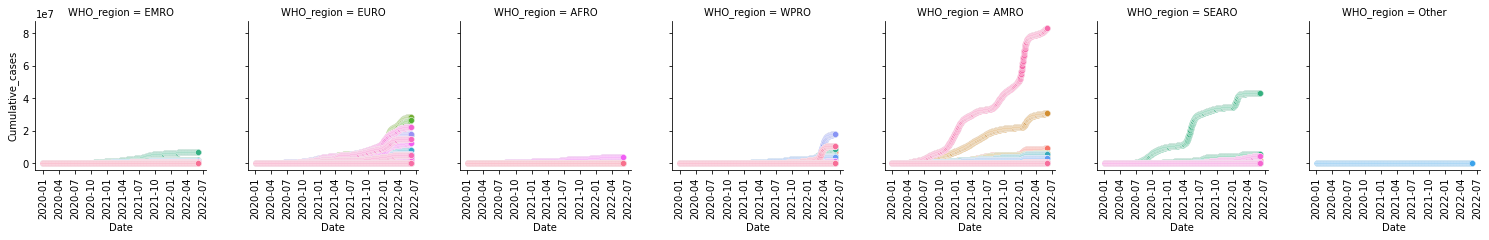

In [ ]:
g=sns.FacetGrid(data=df,col='WHO_region',hue="Country_code")
g.map(sns.scatterplot, "Date", "Cumulative_cases", alpha=.7)
for ax in g.axes.flat:
  for label in ax.get_xticklabels():
    label.set_rotation(90)

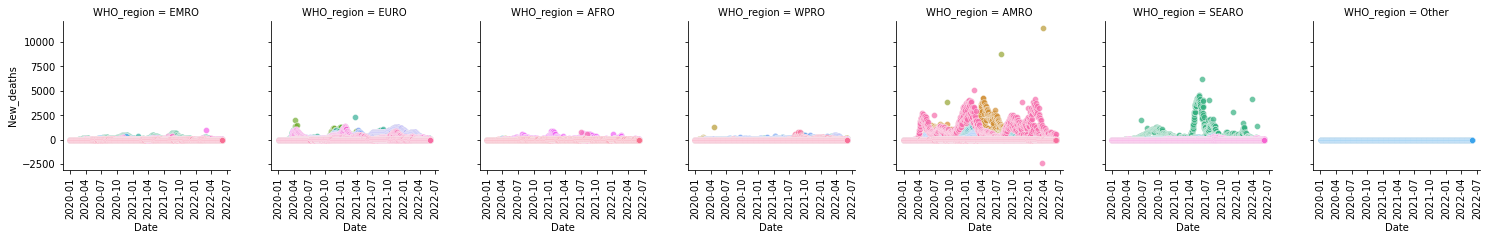

In [ ]:
g=sns.FacetGrid(data=df,col='WHO_region',hue="Country_code")
g.map(sns.scatterplot, "Date", "New_deaths", alpha=.7)
for ax in g.axes.flat:
  for label in ax.get_xticklabels():
    label.set_rotation(90)

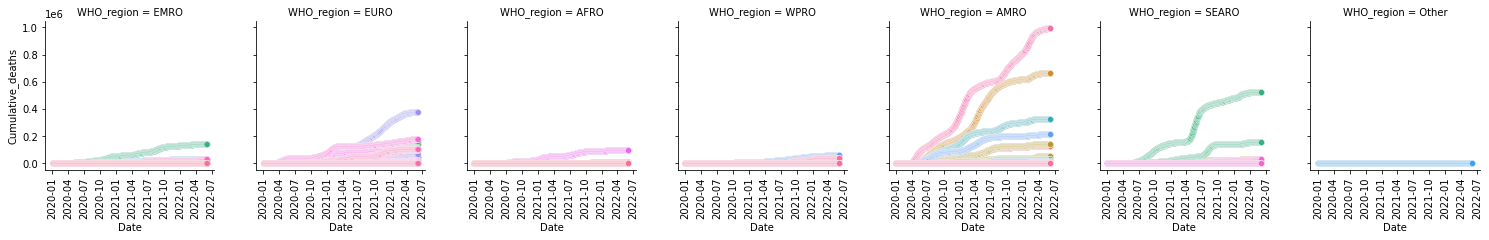

In [ ]:
g=sns.FacetGrid(data=df,col='WHO_region',hue="Country_code")
g.map(sns.scatterplot, "Date", "Cumulative_deaths", alpha=.7)
for ax in g.axes.flat:
  for label in ax.get_xticklabels():
    label.set_rotation(90)

In [ ]:
df_heat=df.corr()

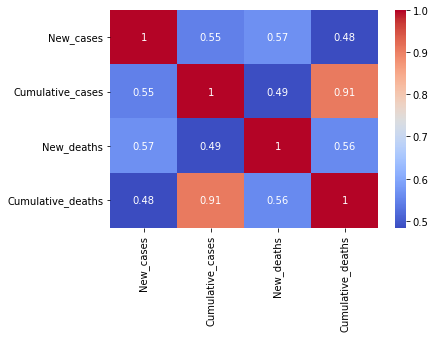

In [ ]:
sns.heatmap(df_heat,cmap='coolwarm', annot=True)

# 6 Reasonably Involved Questions to ask for this Dataset

**1. Which Region has been affected a lot recently?**

Answer : The AMRO Region has been affected a lot since we can clearly see a spike in the number of new cases from 2022-01 to 2022-04 in the new cases graph

**2. Which Regions have been affected the least recently?**

Answer : The EMRO and AFRO Regions have been affected the least since we can see almost no change in the number of new cases in the new cases graph

**3. What is the status of India and neighboring countries?**

Answer: India comes in the SEARO Region(South-East Asia Regional Office). We can see spikes in 2022-04 and 2021-04. We can validate this data by our IIT B All Campus Covid Updates Mail attached below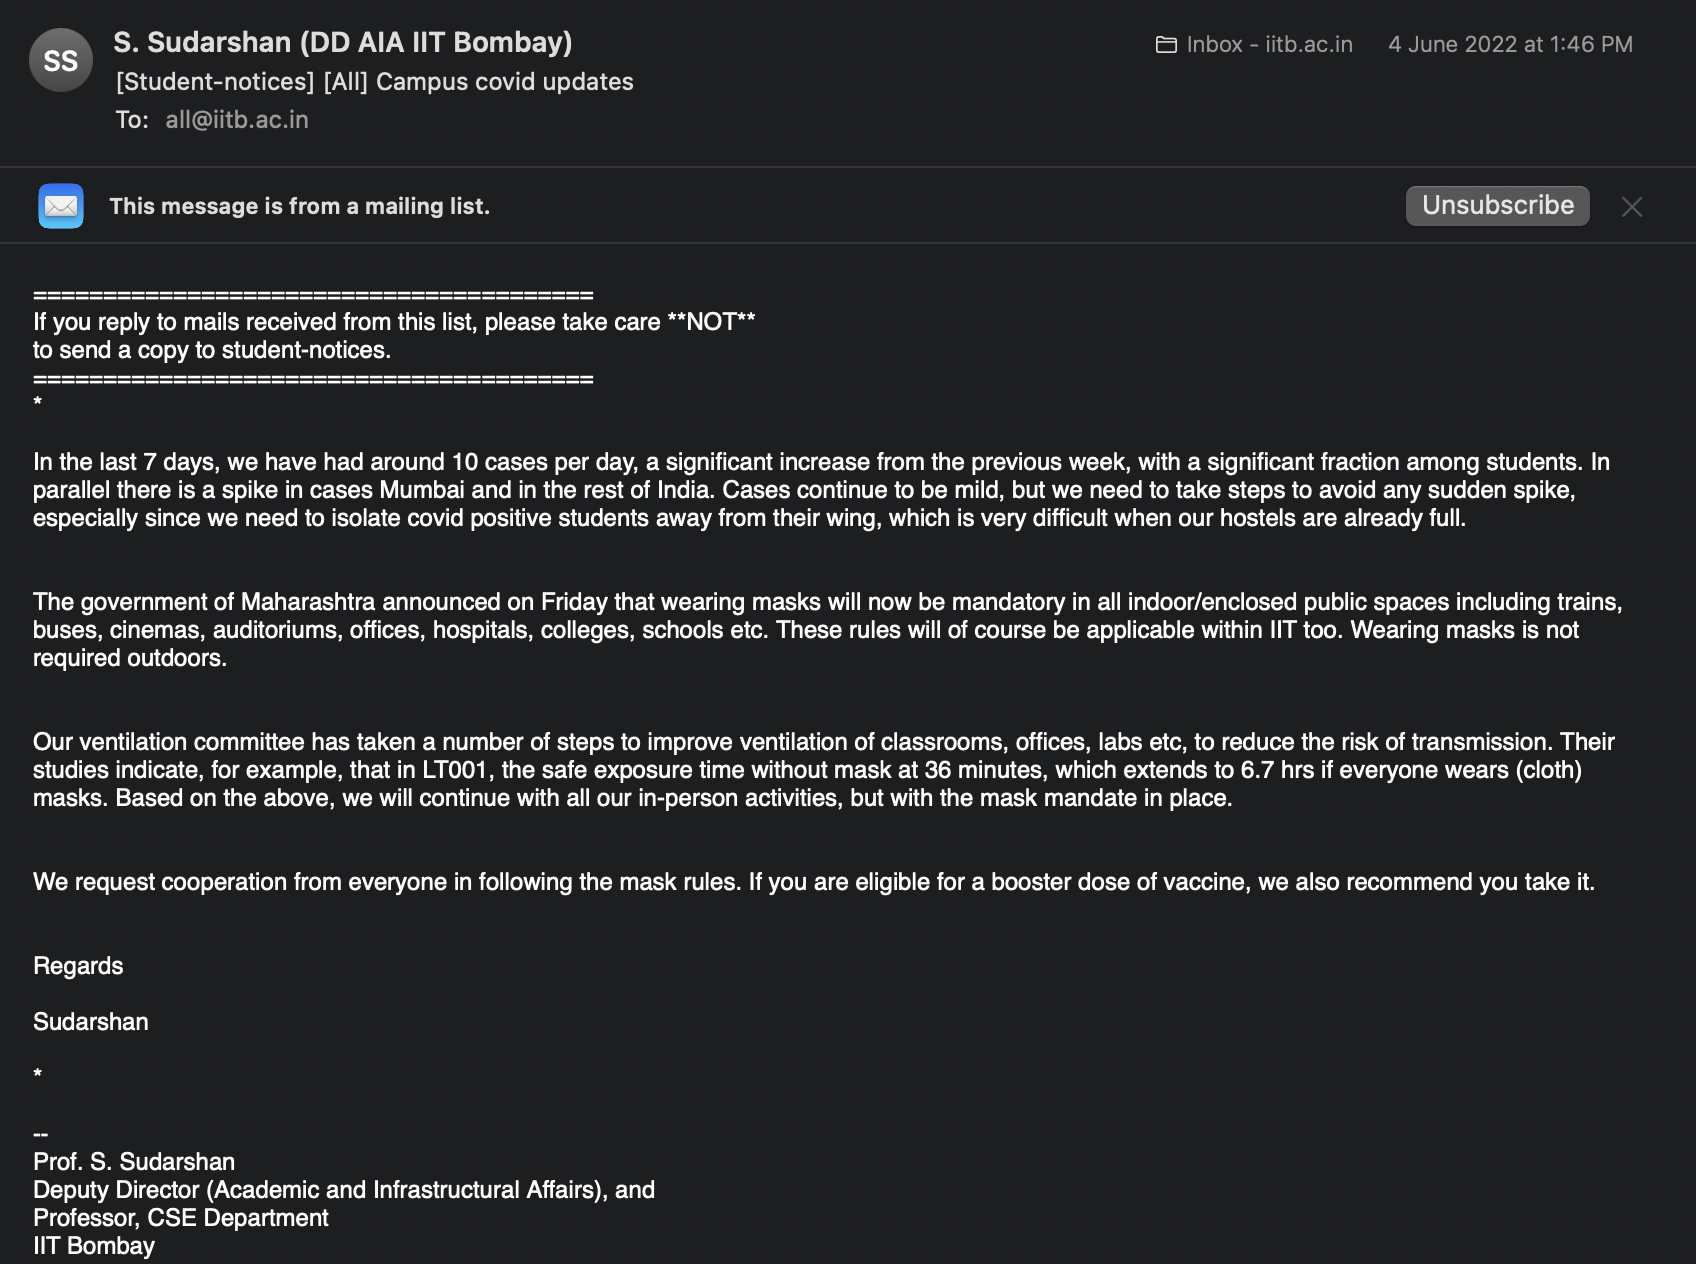

**4. What can we say about the correlation of New_cases,Cumulative_Cases,New_deaths and Cumulative_Deaths?**

Answer: We can see that the highest correlation of 0.91 occured between Cumulative_Cases and Cumulative_Deaths followed by correlation between New_cases and New_deaths of 0.57.

**5. What does the Graphs tell us in general about the deaths of previous year vs this year?**

Answer: We can see that in all the Regions, there are almost lesser or at the worst equal deaths than that which occured the previous year(2021), which shows the positive effect of vaccination and safety protocols.

**6. What are the significant things we can observe from the above Graphs?**

Answer: We can see that in the SEARO Region, there are almost same spike patterns in new cases graph for 2021-04 and 2022-04 but the new deaths spike for 2022-04 is less than 2021-04 indicating that due to vaccination and safety protocols, we have been able to reduce loss of lives significantly.

Also, AMRO Region had higher spike recently but the number of new deaths remained almost the same as previous year.